# Proyek Analisis Data: Bike Sharing Dataset
- Nama : Sri Nur Marshella
- Email : marshellasri03@gmail.com
- Id Dicoding : srinur2028

#### Menentukan Pertanyaan Bisnis
1. Bagaimana tren jumlah sewa sepeda per bulan?
2. Apa dampak musim terhadap pola penyewaan sepeda?
3. Bagaimana cuaca mempengaruhi tingkat penyewaan sepeda?
4. Bagaimana perbedaan rata-rata sewa sepeda antara hari libur dan hari kerja?
5. Bagaimana distribusi Sewaan Sepeda Berdasarkan Hari?


#### Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

def convert_month(mnth_number):
    return calendar.month_abbr[mnth_number]

#### Data Wragling

In [2]:
day_Data = pd.read_csv("Bike-sharing-dataset/day.csv")
day_Data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_Data = pd.read_csv("C:/Users/ACER/Downloads/Bike-sharing-dataset/hour.csv")
hour_Data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Assesing Data

In [4]:
day_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
#Melihat Jika ada missing value
day_Data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_Data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Melihat Duplikat Data
print("Jumlah duplikasi Day: ", day_Data.duplicated().sum())

Jumlah duplikasi Day:  0


In [9]:
print("Jumlah duplikasi Hour: ", hour_Data.duplicated().sum())

Jumlah duplikasi Hour:  0


In [10]:
#memeriksa parameter statistik
day_Data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hour_Data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
hour_Data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [13]:
day_Data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


#### Exploratory Data Analysis(EDA)
1. Bagaimana tren jumlah sewa sepeda per bulan?
2. Apa dampak musim terhadap pola penyewaan sepeda?
3. Bagaimana cuaca mempengaruhi tingkat penyewaan sepeda?
4. Bagaimana perbedaan rata-rata sewa sepeda antara hari libur dan hari kerja?
5. Bagaimana distribusi Sewaan Sepeda Berdasarkan Hari?

In [14]:
#melihat data sewaan sepeda ditahun 2011, 2012 dan keseluruhan berdasarkan bulan
day_Data.groupby(by=["yr"]).agg({
    "cnt": ["sum", "mean", "max", "min"],
})

cnt                        
        sum         mean   max  min
yr                                 
0   1243103  3405.761644  6043  431
1   2049576  5599.934426  8714   22

In [15]:
day_Data.groupby(by=["mnth"]).agg({
    "cnt": ["sum", "max", "min", ]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt            
         sum   max   min
mnth                    
8     351194  7865  1115
6     346342  8120  3767
9     345991  8714  1842
7     344948  8173  3285
5     331686  8294  2633
10    322352  8156    22
4     269094  7460   795
11    254831  6852  1495
3     228920  8362   605
12    211036  6606   441
2     151352  5062  1005
1     134933  4521   431

In [16]:
day_Data.groupby(by=["yr", "mnth"]).agg({
    "cnt": ["max", "min", "sum"],
})



cnt              
          max   min     sum
yr mnth                    
0  1     1985   431   38189
   2     2927  1005   48215
   3     3239   605   64045
   4     5312   795   94870
   5     5805  2633  135821
   6     5515  3767  143512
   7     6043  3285  141341
   8     5895  1115  136691
   9     5423  1842  127418
   10    5511   627  123511
   11    4486  1495  102167
   12    3940   705   87323
1  1     4521  1301   96744
   2     5062  1529  103137
   3     8362  3194  164875
   4     7460  1027  174224
   5     8294  2843  195865
   6     8120  4127  202830
   7     8173  4459  203607
   8     7865  4549  214503
   9     8714  4073  218573
   10    8156    22  198841
   11    6852  2277  152664
   12    6606   441  123713

In [17]:
day_Data_2011 = day_Data[day_Data['yr'] == 0]
day_Data_2011.groupby(by="mnth").agg({
    "cnt": ["sum", "max", "min" ]
}).sort_values(by=("cnt", "sum"), ascending=False)


cnt            
         sum   max   min
mnth                    
6     143512  5515  3767
7     141341  6043  3285
8     136691  5895  1115
5     135821  5805  2633
9     127418  5423  1842
10    123511  5511   627
11    102167  4486  1495
4      94870  5312   795
12     87323  3940   705
3      64045  3239   605
2      48215  2927  1005
1      38189  1985   431

In [18]:
day_Data_2012 = day_Data[day_Data['yr'] == 1]
day_Data_2012.groupby(by="mnth").agg({
    "cnt": ["sum", "max", "min"]
}).sort_values(by=("cnt", "sum"), ascending=False)


cnt            
         sum   max   min
mnth                    
9     218573  8714  4073
8     214503  7865  4549
7     203607  8173  4459
6     202830  8120  4127
10    198841  8156    22
5     195865  8294  2843
4     174224  7460  1027
3     164875  8362  3194
11    152664  6852  2277
12    123713  6606   441
2     103137  5062  1529
1      96744  4521  1301

In [19]:
day_Data.groupby(by="mnth").agg({
    "cnt": ["sum", "mean", "max", "min" ]
}).sort_values(by=("cnt", "sum"), ascending=False)


cnt                         
         sum         mean   max   min
mnth                                 
8     351194  5664.419355  7865  1115
6     346342  5772.366667  8120  3767
9     345991  5766.516667  8714  1842
7     344948  5563.677419  8173  3285
5     331686  5349.774194  8294  2633
10    322352  5199.225806  8156    22
4     269094  4484.900000  7460   795
11    254831  4247.183333  6852  1495
3     228920  3692.258065  8362   605
12    211036  3403.806452  6606   441
2     151352  2655.298246  5062  1005
1     134933  2176.338710  4521   431

In [20]:
#Melihat data penyewaan sepeda berdasarkan musim
day_Data.groupby(by="season").agg({
    "cnt": ["sum", "mean", "max", "min" ],
    "atemp": "mean",
    "windspeed": "mean"
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                              atemp windspeed
            sum         mean   max   min      mean      mean
season                                                      
3       1061129  5644.303191  8714  1115  0.655898  0.172095
2        918589  4992.331522  8362   795  0.520307  0.203507
4        841613  4728.162921  8555    22  0.415539  0.171995
1        471348  2604.132597  7836   431  0.296914  0.214537

In [21]:
#Melihat data penyewaan sepeda berdasarkan cuaca
day_Data.groupby(by="weathersit").agg({
    "cnt": ["sum", "mean", "max", "min" ],
    "atemp": "mean",
    "windspeed": "mean"
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                             atemp windspeed
                sum         mean   max  min      mean      mean
weathersit                                                     
1           2257952  4876.786177  8714  431  0.488596  0.190253
2            996858  4035.862348  8362  605  0.452868  0.186431
3             37869  1803.285714  4639   22  0.413064  0.243336

In [22]:
#Melihat data penyewaan sepeda berdasarkan hari libur/tidak, dan melihat jam rata rata kenaikan penyewaan
day_Data.groupby(by="workingday").agg({
    "cnt": ["sum", "mean", "max", "min" ],
})


cnt                        
                sum         mean   max  min
workingday                                 
0           1000269  4330.168831  8714  605
1           2292410  4584.820000  8362   22

In [23]:
hour_Data.groupby(by=["hr"]).agg({
    "cnt": ["sum", "mean" ]
})

cnt            
       sum        mean
hr                    
0    39130   53.898072
1    24164   33.375691
2    16352   22.869930
3     8174   11.727403
4     4428    6.352941
5    14261   19.889819
6    55132   76.044138
7   154171  212.064649
8   261001  359.011004
9   159438  219.309491
10  126257  173.668501
11  151320  208.143054
12  184414  253.315934
13  184919  253.661180
14  175652  240.949246
15  183149  251.233196
16  227748  311.983562
17  336860  461.452055
18  309772  425.510989
19  226789  311.523352
20  164550  226.030220
21  125445  172.314560
22   95612  131.335165
23   63941   87.831044

In [24]:
hour_Data.groupby(by=["workingday", "hr"]).agg({
    "cnt": ["sum", "mean" ]
})

cnt            
                  sum        mean
workingday hr                    
0          0    20884   90.800000
           1    15987   69.508696
           2    12123   53.171053
           3     5851   25.775330
           4     1876    8.264317
           5     1929    8.689189
           6     4292   18.742358
           7    10027   43.406926
           8    24406  105.653680
           9    39645  171.623377
           10   59115  255.909091
           11   72838  315.316017
           12   84606  366.259740
           13   86101  372.731602
           14   84233  364.645022
           15   82886  358.813853
           16   81480  352.727273
           17   74740  323.549784
           18   64643  281.056522
           19   53285  231.673913
           20   40190  174.739130
           21   32674  142.060870
           22   26694  116.060870
           23   19764   85.930435
1          0    18246   36.786290
           1     8177   16.552632
           2     4229    8.683778
           3     2323    4.942553
           4     2552    5.429787
           5    12332   24.913131
           6    50840  102.500000
           7   144144  290.612903
           8   236595  477.006048
           9   119793  241.518145
           10   67142  135.366935
           11   78482  158.229839
           12   99808  200.820926
           13   98818  198.429719
           14   91419  183.572289
           15  100263  201.331325
           16  146268  293.122244
           17  262120  525.290581
           18  245129  492.226908
           19  173504  348.401606
           20  124360  249.718876
           21   92771  186.287149
           22   68918  138.389558
           23   44177   88.708835

In [25]:
workingday_0 = hour_Data[hour_Data['workingday'] == 0]
workingday_0.groupby(by="hr").agg({
    "cnt": ["sum", "mean", "max", "min"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                     
      sum        mean  max min
hr                            
13  86101  372.731602  760  30
12  84606  366.259740  776  32
14  84233  364.645022  750  23
15  82886  358.813853  750   7
16  81480  352.727273  783  11
17  74740  323.549784  731  15
11  72838  315.316017  663  27
18  64643  281.056522  676  23
10  59115  255.909091  539  12
19  53285  231.673913  554  11
20  40190  174.739130  551  11
9   39645  171.623377  397  14
21  32674  142.060870  584   7
22  26694  116.060870  502   9
8   24406  105.653680  597   5
0   20884   90.800000  249   6
23  19764   85.930435  239   2
1   15987   69.508696  168   4
2   12123   53.171053  132   2
7   10027   43.406926  387   1
3    5851   25.775330   79   2
6    4292   18.742358  133   1
5    1929    8.689189   55   1
4    1876    8.264317   28   1

In [26]:
workingday_1 = hour_Data[hour_Data['workingday'] == 1]
workingday_1.groupby(by="hr").agg({
    "cnt": ["sum", "mean", "max", "min"]
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                     
       sum        mean  max min
hr                             
17  262120  525.290581  976  26
18  245129  492.226908  977  26
8   236595  477.006048  839  31
19  173504  348.401606  743  18
16  146268  293.122244  634  13
7   144144  290.612903  596  18
20  124360  249.718876  567  23
9   119793  241.518145  426  23
15  100263  201.331325  601  13
12   99808  200.820926  471   3
13   98818  198.429719  428  11
21   92771  186.287149  398   6
14   91419  183.572289  651  12
11   78482  158.229839  361  10
22   68918  138.389558  321  11
10   67142  135.366935  275   8
6    50840  102.500000  213   7
23   44177   88.708835  256   9
0    18246   36.786290  283   2
5    12332   24.913131   66   1
1     8177   16.552632  114   1
2     4229    8.683778   74   1
4     2552    5.429787   17   1
3     2323    4.942553   36   1

In [27]:
#Melihat data penyewaan sepeda berdasarkan hari dalam seminggu
day_Data.groupby(by="weekday").agg({
    "cnt": ["sum", "mean", "median", "count", "max", "min" ],
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                                       
            sum         mean  median count   max   min
weekday                                               
5        487790  4690.288462  4601.5   104  8362  1167
4        485395  4667.259615  4721.0   104  7804   431
6        477807  4550.542857  4521.0   105  8714   627
3        473048  4548.538462  4642.5   104  8173   441
2        469109  4510.663462  4576.5   104  7767   683
1        455503  4338.123810  4359.0   105  7525    22
0        444027  4228.828571  4334.0   105  8227   605

In [28]:
day_2011 = hour_Data[hour_Data['yr'] == 0]
day_2011.groupby(by="weekday").agg({
    "cnt": ["sum", "mean", "max", "min" ],
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                     
            sum        mean  max min
weekday                             
5        182006  146.897498  591   1
2        180338  147.576105  651   1
1        180221  145.927935  620   1
6        179743  142.201741  506   1
0        177074  143.845654  500   1
4        174552  142.491429  628   1
3        169169  137.647681  638   1

In [29]:
day_2012 = hour_Data[hour_Data['yr'] == 1]
day_2012.groupby(by="weekday").agg({
    "cnt": ["sum", "mean", "max", "min" ],
}).sort_values(by=("cnt", "sum"), ascending=False)

cnt                     
            sum        mean  max min
weekday                             
4        310843  249.472713  976   1
5        305784  245.019231  957   1
3        303879  243.883628  977   1
6        298064  238.833333  783   1
2        288771  234.582453  970   1
1        275282  221.287781  968   1
0        266953  210.033832  776   1

In [30]:
#melihat korelasi data
correlation_Data = ["season" ,"holiday","weekday","workingday","weathersit","atemp","hum", "windspeed",  "cnt"]
day_Data[correlation_Data].corr()

#terlihat bahwa ternyata jumlah sewa sepeda memiliki kolerasi negatif (berkebalikan) dengan hari libur, cuaca, kelembapan dan angin.


,season,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
season,1.000000,-0.010537,-0.003080,0.012485,0.019211,0.342876,0.205445,-0.229046,0.406100
holiday,-0.010537,1.000000,-0.101960,-0.253023,-0.034627,-0.032507,-0.015937,0.006292,-0.068348
weekday,-0.003080,-0.101960,1.000000,0.035790,0.031087,-0.007537,-0.052232,0.014282,0.067443
workingday,0.012485,-0.253023,0.035790,1.000000,0.061200,0.052182,0.024327,-0.018796,0.061156
weathersit,0.019211,-0.034627,0.031087,0.061200,1.000000,-0.121583,0.591045,0.039511,-0.297391
atemp,0.342876,-0.032507,-0.007537,0.052182,-0.121583,1.000000,0.139988,-0.183643,0.631066
hum,0.205445,-0.015937,-0.052232,0.024327,0.591045,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.229046,0.006292,0.014282,-0.018796,0.039511,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.406100,-0.068348,0.067443,0.061156,-0.297391,0.631066,-0.100659,-0.234545,1.000000


#### Visualization & Explanatory Analysis

1. Bagaimana tren jumlah sewa sepeda per bulan?

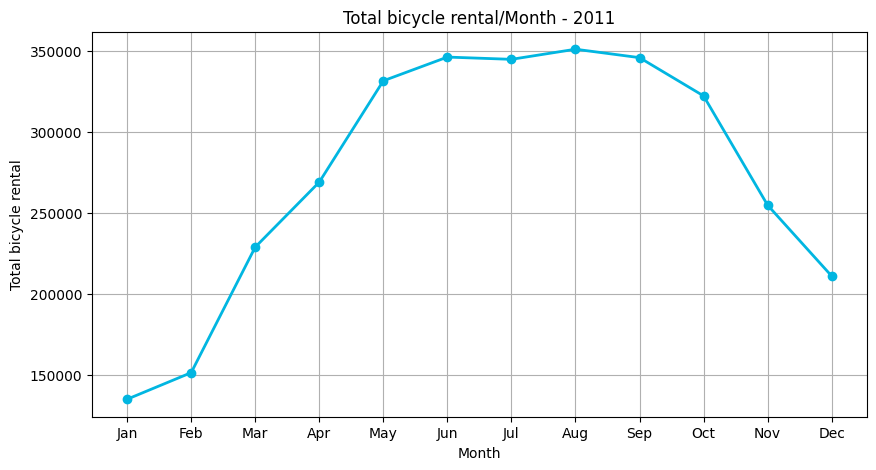

In [31]:
sum_bike_ = day_Data.groupby('mnth')['cnt'].sum().reset_index()

sum_bike_['mnth'] = sum_bike_['mnth'].apply(convert_month)

plt.figure(figsize=(10, 5))
plt.plot(sum_bike_['mnth'], sum_bike_['cnt'], marker='o', linewidth=2, color="#01B6E1")
plt.xlabel('Month')
plt.ylabel('Total bicycle rental')
plt.title('Total bicycle rental/Month - 2011')
plt.grid(True)
plt.show()

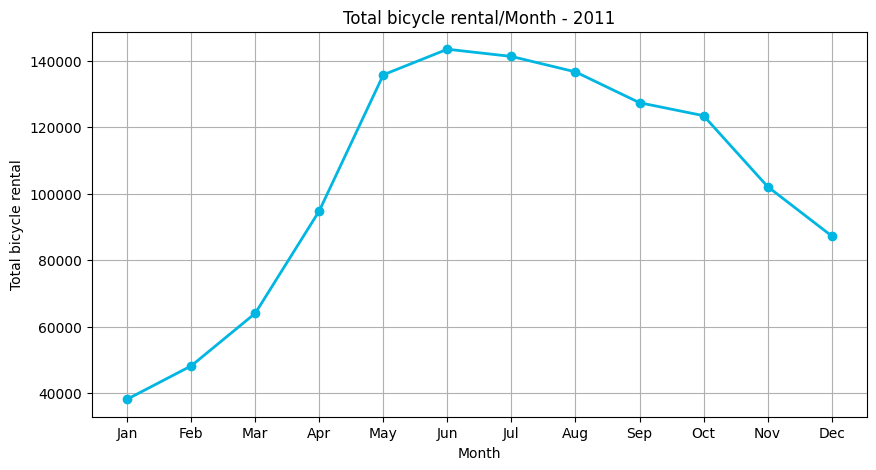

In [32]:
day_Data_2011 = day_Data[day_Data['yr'] == 0]
sum_bike_2011 = day_Data_2011.groupby('mnth')['cnt'].sum().reset_index()

sum_bike_2011['mnth'] = sum_bike_2011['mnth'].apply(convert_month)

plt.figure(figsize=(10, 5))
plt.plot(sum_bike_2011['mnth'], sum_bike_2011['cnt'], marker='o', linewidth=2, color="#01B6E1")
plt.xlabel('Month')
plt.ylabel('Total bicycle rental')
plt.title('Total bicycle rental/Month - 2011')
plt.grid(True)
plt.show()


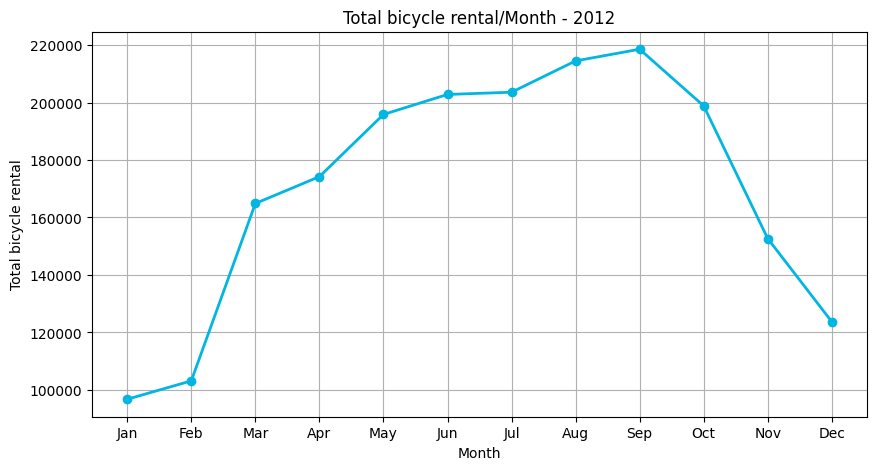

In [33]:
day_Data_2012 = day_Data[day_Data['yr'] == 1]
sum_bike_2012 = day_Data_2012.groupby('mnth')['cnt'].sum().reset_index()

sum_bike_2012['mnth'] = sum_bike_2012['mnth'].apply(convert_month)

plt.figure(figsize=(10, 5))
plt.plot(sum_bike_2012['mnth'], sum_bike_2012['cnt'], marker='o', linewidth=2, color="#01B6E1")
plt.xlabel('Month')
plt.ylabel('Total bicycle rental')
plt.title('Total bicycle rental/Month - 2012')
plt.grid(True)
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_5956\2781121418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


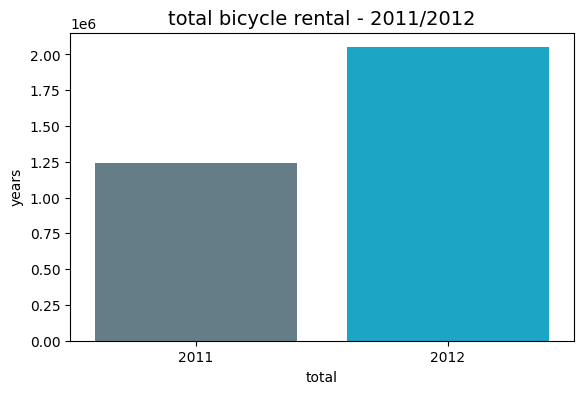

In [34]:
total_Y = day_Data.groupby('yr')['cnt'].sum().reset_index()
total_X = ['2011', '2012']
colors = ["#5E808C", "#01B6E1"]
plt.figure(figsize=(6.5, 4))
sns.barplot(
    y="cnt",  
    x= total_X,  
    data = total_Y,  
    palette= colors  
)
plt.title("total bicycle rental - 2011/2012", loc="center", fontsize=14)
plt.ylabel("years")
plt.xlabel("total")
plt.show()

2. Apa dampak musim terhadap pola penyewaan sepeda?

C:\Users\ACER\AppData\Local\Temp\ipykernel_5956\107207043.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


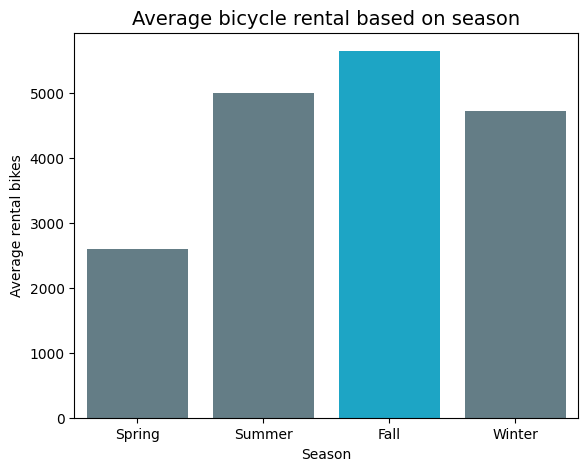

In [35]:
season_Y = day_Data.groupby('season')['cnt'].mean().reset_index()
season_X = ['Spring', 'Summer', 'Fall', 'Winter']
colors = ["#5E808C", "#5E808C", "#01B6E1", "#5E808C"]
plt.figure(figsize=(6.5, 5))
sns.barplot(
    y="cnt",  
    x= season_X,  
    data = season_Y,  
    palette= colors  
)
plt.title("Average bicycle rental based on season", loc="center", fontsize=14)
plt.ylabel("Average rental bikes")
plt.xlabel("Season")
plt.show()


3. Bagaimana cuaca mempengaruhi tingkat penyewaan sepeda?

C:\Users\ACER\AppData\Local\Temp\ipykernel_5956\160648842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


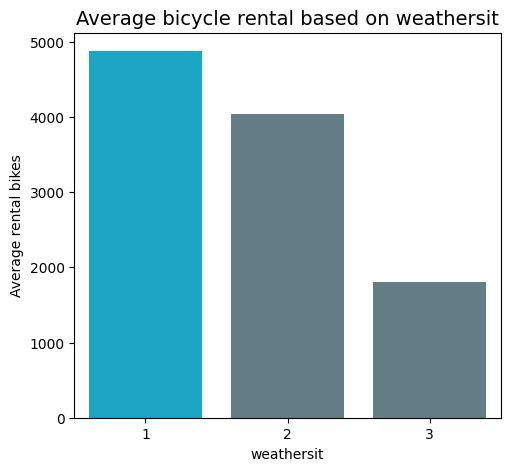

In [36]:
weathersit_Y = day_Data.groupby('weathersit')['cnt'].mean().reset_index()
colors = ["#01B6E1", "#5E808C", "#5E808C"]
plt.figure(figsize=(5.5, 5))
sns.barplot(
    y='cnt',  
    x= 'weathersit',  
    data = weathersit_Y,  
    palette= colors  
)
plt.title("Average bicycle rental based on weathersit", loc="center", fontsize=14)
plt.ylabel("Average rental bikes")
plt.xlabel("weathersit")
plt.show()

4. Bagaimana perbedaan rata-rata sewa sepeda antara hari libur dan hari kerja?

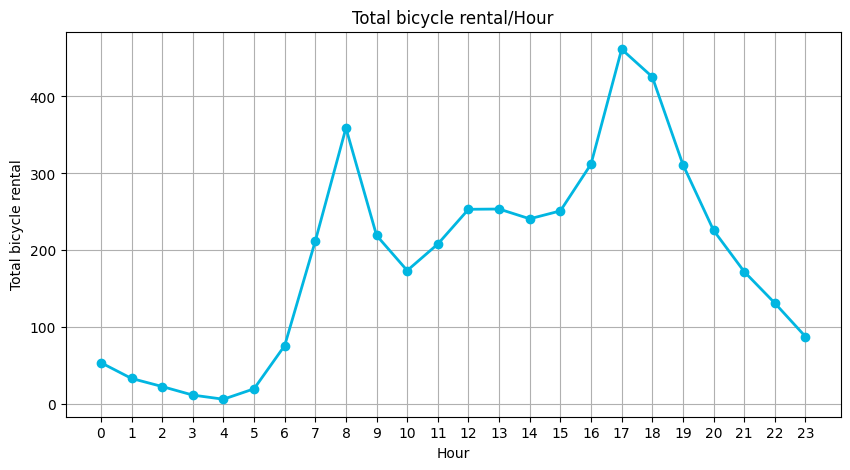

In [37]:
bike_hour = hour_Data.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(bike_hour['hr'], bike_hour['cnt'], marker='o', linewidth=2, color="#01B6E1")
plt.xticks(np.arange(0, 24, 1))
plt.xlabel('Hour')
plt.ylabel('Total bicycle rental')
plt.title('Total bicycle rental/Hour')
plt.grid(True)
plt.show()


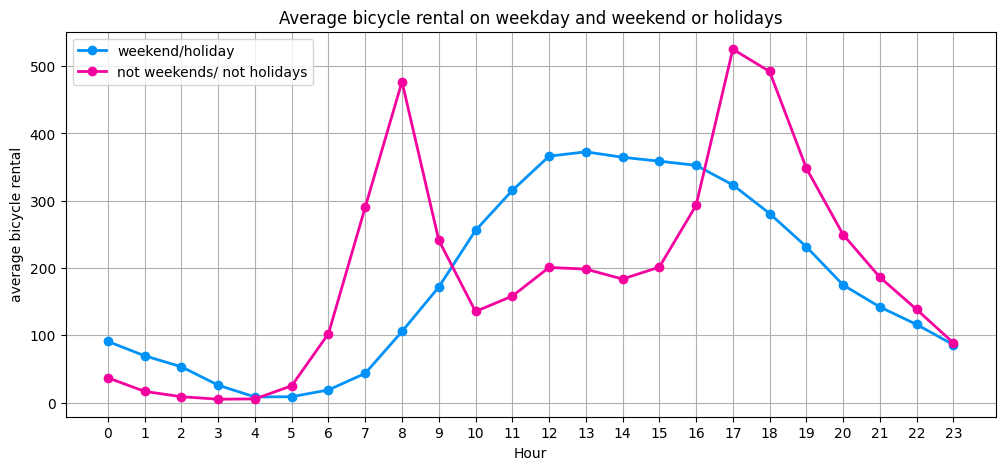

In [38]:
workingday_1 = hour_Data[hour_Data['workingday'] == 0]
workingday_2 = hour_Data[hour_Data['workingday'] == 1]
mean_worikingday_1 = workingday_1.groupby('hr')['cnt'].mean().reset_index()
mean_worikingday_2 = workingday_2.groupby('hr')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(mean_worikingday_1['hr'], mean_worikingday_1['cnt'], marker='o', linewidth=2, label = 'weekend/holiday', color="#0092F6")
plt.plot(mean_worikingday_2['hr'], mean_worikingday_2['cnt'], marker='o', linewidth=2, label = 'not weekends/ not holidays', color="#F4029E")
plt.xticks(np.arange(0, 24, 1))
plt.xlabel('Hour')
plt.ylabel('average bicycle rental')
plt.title('Average bicycle rental on weekday and weekend or holidays')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_5956\2188374110.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=data_workingday, palette="deep")


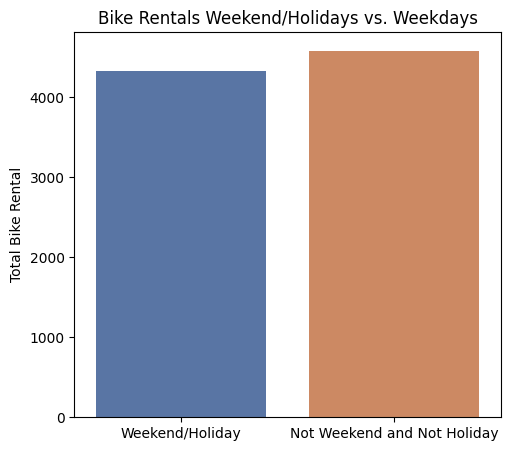

In [39]:
data_workingday = day_Data.groupby('workingday')['cnt'].mean().reset_index()
Working_Day = ['Weekend/Holiday', 'Not Weekend and Not Holiday']
plt.figure(figsize=(5.5, 5))
sns.barplot(x='workingday', y='cnt', data=data_workingday, palette="deep")
plt.xticks([0, 1], Working_Day)
plt.xlabel(None)
plt.ylabel('Total Bike Rental')
plt.title('Bike Rentals Weekend/Holidays vs. Weekdays')
plt.show()

5. Bagaimana distribusi Sewaan Sepeda Berdasarkan Hari?

C:\Users\ACER\AppData\Local\Temp\ipykernel_5956\705802018.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weekday', y='cnt', data=day_Data, palette = 'deep')


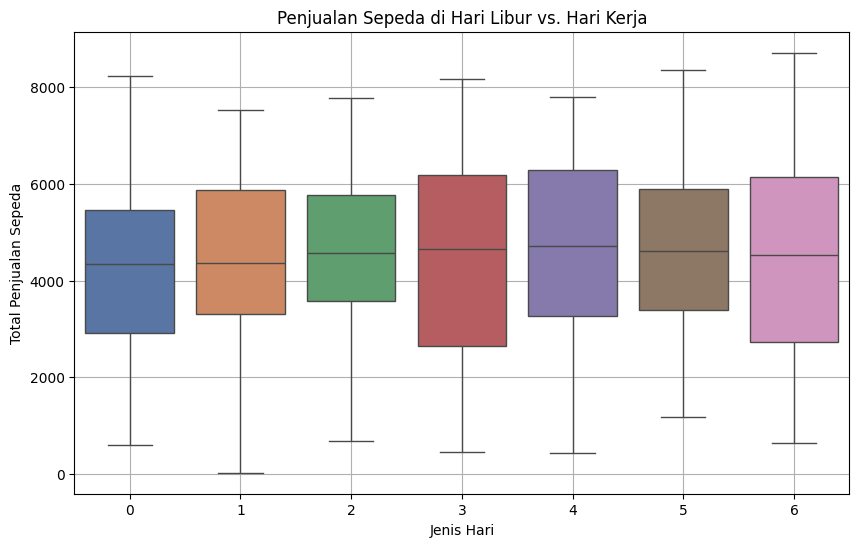

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=day_Data, palette = 'deep')
plt.xlabel('Jenis Hari')
plt.ylabel('Total Penjualan Sepeda')
plt.title('Penjualan Sepeda di Hari Libur vs. Hari Kerja')
plt.grid(True)
plt.show()


#### Kesimpulan

##### 1. Bagaimana tren jumlah sewa sepeda per bulan?
jumlah penyewaan sepeda mengalami kenaikan ditahun 2012. Pada tahun 2011 jumlah penyewaan sebesar 1.243.103 dan pada tahun 2012 sebesar 2.049.576, sehingga terjadi kenaikan jumlah sewa sebesar 806.473 atau sekitar 24.49%. jika diperharikan dari ketiga garfik tersebut dapat terlihat bahwa jumlah penyewaan selalu naik cukup signifikan dibulan mei, kemudian cukup mendapatkan kestabilan hingga bulan september kemudian turun dimulai bulan oktober. Selain itu, dapat dilihat bahwa bulan januari selalu memiliki jumlah sewa terkecil bahkan secara keseluruhan bulan januari didapat jumlah sewa sebesar 134.933.

##### 2. Apa dampak musim terhadap pola penyewaan sepeda?
Dari grafik diatas terlihat bahwa rata rata jumlah sewa tertinggi ada dimusim gugur dengan rata rata sewaan 5644,303 sepeda, dan terendah ada di musim semi dengan rata rata sewaan 2604.132 sepeda. Dalam data, musim gugur berada dibulan juni-agustus dan musim semi dibulan desember-februari. Jika kita hubungkan dengan data penyewaan berdarkan bulan dalam grafik sebelumnya, terlihat bahwa pada bulan juni-agustus jumlah sewa memang cenderung stabil dalam kondisi tertinggi, dan dibulan des-februari jumlah sewa menunjukan jumlah yang sedikit.

##### 3. Bagaimana cuaca mempengaruhi tingkat penyewaan sepeda?
Dari grafik diatas terlihat bahwa rata rata jumlah sewa tertinggi yaitu saat cuaca cenderung cerah (1) dengan rata rata sewa 4876.786 sepeda dan terendah adalah cuaca keempat atau cenderung hujan lebat, bahkan dicuaca ini tidak ada satu sewa sepeda yang terjadi.

##### 4. Bagaimana perbedaan rata-rata sewa sepeda antara hari libur dan hari kerja?
Dari grafik diatas terlihat bahwa rata rata jumlah sewa tertinggi yaitu saat hari weekda atau bukan hari libur dan bukan akhir minggu. Dan jika kita analisis lebih lanjut yaitu berdasarkan jam, secara keseluruhan terlihat bahwa rata rata jumlah sewa tertinggi terjadi di jam 8 pagi dan jam 5-6 sore. Namun jika kita lihar dari garfik berdasarkan jenis hari, terlihat bahwa pada akhir minggu atau hari libur rata rata jumlah sepeda mencapai puncak tertingginya di jam 12 siang hingga jam 5 sore.

##### 5. Bagaimana distribusi Sewaan Sepeda Berdasarkan Hari
Jika kita lihat berdasarkan tabel jumlah sewa, hari sabtu memiliki jumlah tertinggi sebesar 487.790 sewa, akan tetapi dalam boxplot terlihat bahwa hari jumat memiliki nilai median tertinggi diantara lainnya hal ini menunjukkan bahwa distribusi penyewaan sepeda pada hari Jumat lebih merata dan konsisten. 